In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNca2VycnlccmVwb3NcYnVzaTcyMS05MDFcc2xpZGVz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp1252.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1728318408.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python

In [2]:
import yfinance as yf
import plotly.graph_objects as go
import numpy as np

spy = yf.download('SPY', start=1990)['Close']
spy = spy.resample('Y').last()
spy = spy.pct_change().dropna()
spy.index = spy.index.to_period('Y').astype(str)
spy = spy.reset_index()
spy.columns = ['date', 'ret']

trace = go.Scatter(
    x=spy.date,
    y=spy.ret,
        hovertemplate="%{x}<br>%{y:.1%}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="",
    yaxis_tickformat=".0%",
    width=1000,
    height=460,
  )
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)

fig.show()

[*********************100%***********************]  1 of 1 completed


C:\Users\kerry\AppData\Local\Temp\ipykernel_24820\3877559837.py:6: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [3]:
compound = (1+spy.ret).cumprod()

trace = go.Scatter(
    x=spy.date,
    y=compound,
        hovertemplate="%{x}<br>$%{y:.2f}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation from $1",
    yaxis_tickformat=".0f",
    width=1000,
    height=460,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="right", 
        x=0.99
    )
  )
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)

fig.show()

In [4]:
r1 = np.cumprod([1] + 51*[1.1])
r2 = np.cumprod([1] + 30*[1.02] + 21*[1.1])
years = np.arange(1970, 2022)

trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>accum = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    yaxis_tickprefix="$", 
    yaxis_tickformat=",.0f",
    width=1000,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    )
)

fig.show()

In [5]:
trace1 = go.Scatter(
  x=years,
  y=np.log10(r1),
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=np.log10(r2),
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>log = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Log of Accumulation",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    yaxis_tickformat=",.1f",
    width=1000,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    )
)

fig.show()

In [6]:
trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>$%{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    yaxis_type="log",
    yaxis_tickformat=",.0f",
    yaxis_tickprefix="$",
    width=1000,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 5, 10, 20, 50, 100],
    )
)

fig.show()

In [7]:
trace = go.Scatter(
    x=spy.date,
    y=compound,
        hovertemplate="%{x}<br>$%{y:.2f}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation from $1",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    yaxis_tickformat=".0f",
    yaxis_type="log",
    width=1000,
    height=460,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [2, 5, 10, 16],
    )
  )

fig.show()

In [8]:
trace = go.Box(
    x=spy.ret,
    text=spy.date,
    hovertemplate="%{text}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    yaxis_title="",
    xaxis_title="Annual Return",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
    width=1000,
    height=500,
)

fig.show()

In [9]:
from scipy.stats import norm
from scipy.stats import gaussian_kde as kde

density = kde(spy.ret)
grid = np.linspace(np.min(spy.ret), np.max(spy.ret), 100)

trace1 = go.Scatter(
  x=grid,
  y=density(grid),
  mode="lines",
  name="actual"
)

trace2 = go.Scatter(
  x=grid, 
  y=norm.pdf(grid, np.mean(spy.ret), scale=np.std(spy.ret)), 
  mode="lines", 
  name="normal"
)
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Annual Return",
    yaxis_title="",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
    width=1000,
    height=360,
     legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.01
    ),
)

fig.show()

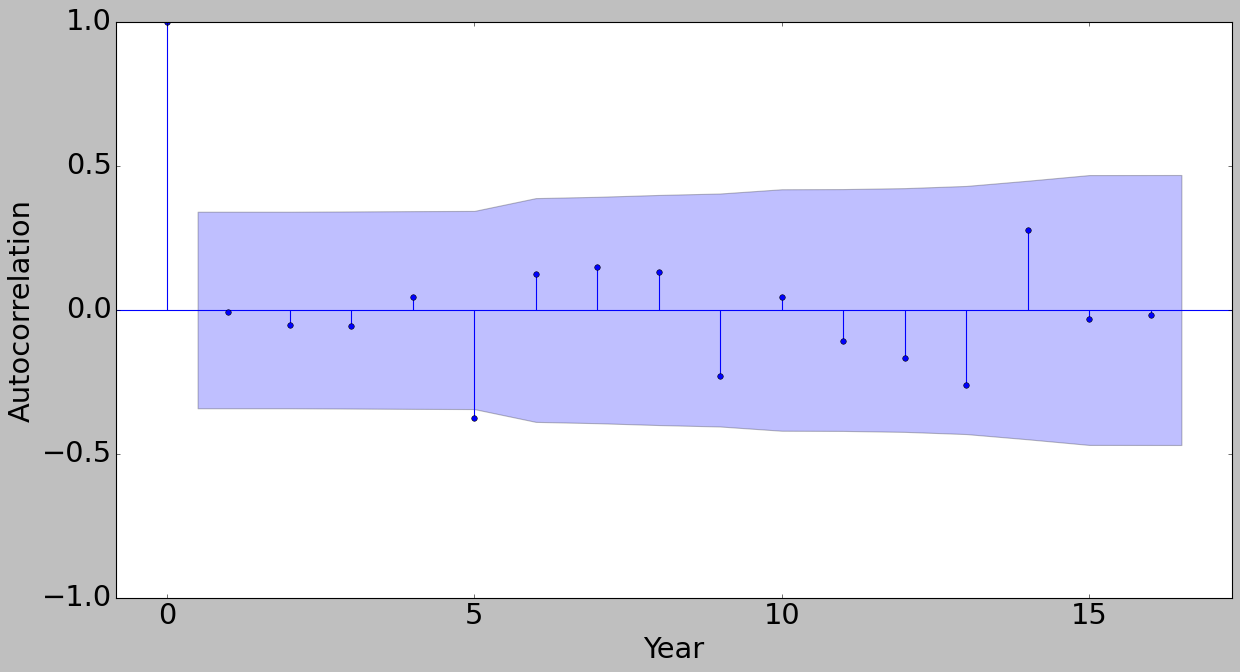

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams.update({'font.size': 26})
fig = plot_acf(spy.ret)
plt.xlabel("Year")
plt.ylabel("Autocorrelation")
plt.title("")

_ = fig.set_size_inches(18,9)

In [11]:
import statsmodels.formula.api as smf

spy['lag'] = spy.ret.shift()
spy = spy.dropna()

trace = go.Scatter(
  x=spy.lag,
  y=spy.ret,
  text=spy.date,
  mode="markers",
  hovertemplate="%{text}<extra></extra>",
  showlegend=False,
  marker=dict(size=15)
)
fig = go.Figure(trace)

result = smf.ols("ret ~ lag", data=spy).fit()
predict = result.params['Intercept'] + result.params['lag']*spy.lag

trace = go.Scatter(
  x=spy.lag,
  y=predict,
  mode="lines",
  name="regression line",
)

fig.add_trace(trace)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Lagged Return",
    yaxis_title="Return",
    xaxis_title_font_size=24,
    yaxis_title_font_size=24,
    font_size=20,
    xaxis_tickformat=".0%",
    yaxis_tickformat=".0%",
    width=1000,
    height=520,
)

fig.show()